

```
`# Importing all necessary libraries`
```



# Importing all necessary libraries

In [ ]:
import tensorflow as tf
import os
import shutil
import random
import numpy as np
from keras import backend as K

import torch
import torchvision
import torchvision.transforms as transforms
from tqdm.notebook import tqdm

import importlib
import cv2
#import utils as ut
import numpy as np
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import normalize
#from Ipython.display import clear_output
from pprint import pprint
from google.colab import files

Checking the details of connected GPU

In [ ]:
# !nvidia-smi

Connecting to drive

In [ ]:
# clone Cervical cancer repository
!git clone https://@github.com/PaulOkwija/Cervical-cancer.git
# !git clone git@github.com:PaulOkwija/Cervical-cancer.git


Cloning into 'Cervical-cancer'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 96 (delta 48), reused 62 (delta 22), pack-reused 4
Unpacking objects: 100% (96/96), 4.44 MiB | 9.07 MiB/s, done.


In [ ]:
%cd Cervical-cancer
from metrics_and_losses import dice_coef, dice_coef_loss, IoU, IoU_loss
from utils import extract_high_agreement_images, extract_images, extract_diff_common, prepare_dataset, Dice_agg, IOU_agg, read_image
from data_preparation import preprocessing, flipUD, flipLR, rotate, create_dataset, prepare_data

#################################################
from models.vgg16_encoder import build_vgg16_unet
from models.mobilenet import unet_model
from models.UNet import Unet_baseline_up2d
#################################################
from metrics_and_losses import IoU_loss
from metrics_and_losses import IoU
from metrics_and_losses import dice_coef
from metrics_and_losses import dice_coef_loss

/content/Cervical-cancer/Cervical-cancer


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Creating a short link to folder in drive

In [ ]:
!ln -s '/content/drive/MyDrive/Work_2022/Cervical cancer' /mydrive

ln: failed to create symbolic link '/mydrive/Cervical cancer': File exists


In [ ]:
os.listdir('/mydrive')

['Cacx_segmentation_2.json',
 'Cacx_segmentation_1.json',
 'final_reviewer_1.csv',
 'final_reviewer_2.csv',
 'Reviewer_1.zip',
 'Reviewer_2.zip',
 'images.zip',
 'masks.zip',
 'utils.py',
 'Cervical cancer',
 'models',
 'reviewer1_cropped.zip',
 'train_models',
 'Preliminaries',
 'predictions',
 'Documentation',
 'UNeXt',
 'Experimental Notebooks',
 'Main (Working) Notebooks',
 'Notes',
 'results']

In [ ]:
# !cp '/mydrive/utils.py' /content
# !cp '/mydrive/models/losses.py' /content
# !cp '/mydrive/models/UNet.py' /content
# !cp '/mydrive/models/mobilenet.py' /content
# !cp '/mydrive/models/vgg16_encoder.py' /content
!cp '/mydrive/final_reviewer_1.csv' /content
!cp '/mydrive/final_reviewer_2.csv' /content

In [ ]:
!cp '/mydrive/images.zip' /content
!cp '/mydrive/masks.zip' /content

!unzip -o -q '/content/images.zip' -d '/content'
!unzip -o -q '/content/masks.zip' -d '/content'

# !cp '/mydrive/reviewer1_cropped.zip' /content
# !cp '/mydrive/masks.zip' /content


In [ ]:
# dataframe = dataset_1
# value = extra[0]
# dataframe[dataframe['Img_name']==value].index[0]
# value in list(dataframe['Img_name'])

In [ ]:
dataset_1 = prepare_dataset('/content/final_reviewer_1.csv')
dataset_2 = prepare_dataset('/content/final_reviewer_2.csv')
common, extra_1, extra_2 = extract_diff_common(dataset_1, dataset_2)

high_agg_df,low_agg = extract_high_agreement_images(dataset_1, dataset_2,common)
df = high_agg_df

# extra = extra_1 + extra_2 + low_agg
# df = extract_images(dataset_1, dataset_2,extra)

Shape of dataset from /content/final_reviewer_1.csv file:  (354, 3)
Shape of dataset from /content/final_reviewer_2.csv file:  (448, 2)
Common images:  301 
Different images(dataset_1 only):  53 
Different images(dataset_2 only):  147
Extracting images and masks
Extracting image_1 and respective masks...
Computing level of agreement...:
IOU: 0.9017963892874223 Dice: 0.9483627105058426 Avg_aggrement: 0.9250795498966324
Extracting image_2 and respective masks...
Computing level of agreement...:
IOU: 0.6226937269372693 Dice: 0.7674815235929505 Avg_aggrement: 0.6950876252651099
Extracting image_3 and respective masks...
Computing level of agreement...:
IOU: 0.8006072874493927 Dice: 0.8892636312535133 Avg_aggrement: 0.844935459351453
Extracting image_4 and respective masks...
Computing level of agreement...:
IOU: 0.8419094854308742 Dice: 0.9141703130259172 Avg_aggrement: 0.8780398992283958
Extracting image_5 and respective masks...
Computing level of agreement...:
IOU: 0.6639043914538587 Di

In [ ]:
dataset_1.head()

,Img_name,Mask1,Mask2
0,A053_1614934171536.png,cksx20qpx000b266faqsm8afg,ckt2stelv005i266f5key9lsm
1,A053_1614934709068.png,cksx264ju000h266f2yccx5aj,ckt2stue7005k266fykrklgfc
2,A065_1615971661643.png,cksx2fvs3000j266fwval6rg0,ckt2sv4b3005m266fx4mpg0r1
3,A065_1615971902439.png,cksx2jaww000l266fxtegukgp,NaN
4,A087_1617961842943.png,cksx2rxm2000n266f2cuxdv4b,ckt2u956d005o266falanhu1z


In [ ]:
dataset_2.head()

,Img_name,Mask1
0,M071_1565687060188.png,cksxex9ru00003b6ar7bvgcoc
1,M075_1565781393764.png,cksxf4g4j000e3b6ajua625wu
2,M075_1565781696144.png,cksxfbgrq000o3b6agk3ju13o
3,M075_1565781731483.png,cksxfdkv3000s3b6a8038ihhp
4,M086_1566802065084.png,cksxfsqzd000w3b6atn3zku3u


In [ ]:
df = df.sort_values(by=['image_path']).reset_index(drop=True)
df.head()

,image_path,mask_path
0,/content/images/A021_1613395802154.png,/content/masks/ckt2soutr005e266fh03qyosd.png
1,/content/images/A034_1614167885710.png,/content/masks/cku5xd5lm000g266iav5b2zph.png
2,/content/images/A034_1614168018629.png,/content/masks/ckt2spu8g005g266fw5mlkfz1.png
3,/content/images/A053_1614934171536.png,/content/masks/cksx20qpx000b266faqsm8afg.png
4,/content/images/A087_1617962685519.png,/content/masks/cksx30gdc000s266f9mx3tf9i.png


In [ ]:
df = df.sample(frac=1, random_state = 5).reset_index(drop=True)
df.head()

,image_path,mask_path
0,/content/images/A523_1627903042116.png,/content/masks/cku8e52cf000a266hw5uaaw76.png
1,/content/images/M136_1567683733105.png,/content/masks/ckt2nyq52000k266fmiypvz3o.png
2,/content/images/M454_1598867708280.png,/content/masks/ckt2w14wq008q266fh8yzre7o.png
3,/content/images/M646_1625656650414.png,/content/masks/cku8gdj6y000t266hg38flfob.png
4,/content/images/J015_1624438353108.png,/content/masks/cksx5xrcs000m266fn1kf4jyj.png


In [ ]:
# !pip install wandb -qU
# !wandb login

# import wandb
# from wandb.keras import WandbCallback

In [ ]:
def set_config(batch_size,epochs,model,test1,test2):
        config = {
            'Notebook': 'Modular_notebook',
            'epochs': epochs,
            'f_num': 32,      #do not include for mobilenet
            'dropout': 0.3,   #mobilenet uses 0.65
            'opt': 'adam',
            # 'learning_rate':0.005,
            'k_init':'he_normal',  #do not include for mobilenet
            'act':'relu',
            'batch_norm': True,
            'batch_size': batch_size,
            'input_shape': [512,512,3],
            'model_name': model,
            'Loss': 'IoU loss',
            'test1' : test1,
            'test2' : test2
            }
        return config

# def set_optimizer(optim,lr):
#   if optim == "sgd":
#       optimizer = tf.keras.optimizers.SGD(learning_rate = lr, momentum=0.9)
#   elif optim == "adam":
#       optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
#   return optimizer

def set_optimizer(optim):
  if optim == "sgd":
      optimizer = tf.keras.optimizers.SGD(momentum=0.9)
  elif optim == "adam":
      optimizer = tf.keras.optimizers.Adam()
  return optimizer



In [ ]:
# from vgg16_encoder import build_vgg16_unet
# from models.vgg16_encoder import build_vgg16_unet
# from losses import bce_dice_loss

# IMG_HEIGHT = 256
# IMG_WIDTH = 256
# IMG_CHANNELS = 3
# Classes = 1

def build_model(dropout, opt):
  IMG_HEIGHT = 512
  IMG_WIDTH = 512
  IMG_CHANNELS = 3
  Classes = 1
  model = build_vgg16_unet(dropout,(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  model.compile(optimizer=opt, loss = [IoU_loss], metrics = [IoU,dice_coef,'accuracy'])
  model.summary()
  return model

# from mobilenet import unet_model
# from models.mobilenet import unet_model
# def build_model(opt):
#   model = unet_model(1)
#   model.compile(optimizer=opt, loss = [IoU_loss], metrics = [IoU,dice_coef,'accuracy'])
#   model.summary()
#   return model

# from UNet import Unet_baseline_up2d
# from models.UNet import Unet_baseline_up2d
# def build_model(f_num, dropout, opt, k_init, act, batch_norm):
#   model = Unet_baseline_up2d((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), f_num = f_num, k_init=k_init, act = act, dropout_rate=dropout, batch_norm = batch_norm)
#   model.compile(optimizer=opt, loss = [IoU_loss], metrics = [IoU,dice_coef,'accuracy'])
#   model.summary()
#   return model
# config.f_num, config.dropout, config.opt, config.k_init, config.act, config.batch_norm


In [ ]:
#Prepare the optimizer
optimizer = set_optimizer('adam')
#Prepare configuration
config = set_config(16,100,'VGG16_UNet',0.5,0.1)

In [ ]:
# wandb.init(config = config,
#             project="Cervical_cancer_modularised_experiments",
#             entity="mugumepaulokwija",
#             notes="Tf data prep, Model: UNet, split",
#             tags=["Fixed_random_Augs", "Extra from both and low_agg","Tf data", "VGG16_UNet"])


In [ ]:
print(config['epochs'])
print(len(df))


100
212


In [ ]:
test_df = df[:50]
train_df = df[50:]
print(len(test_df))
print(len(train_df))

50
162


In [ ]:
# config = wandb.config
# model = build_model(config.f_num, config.dropout, optimizer, config.k_init, config.act, config.batch_norm)
model = build_model(config['dropout'], optimizer)
train_dataset, valid_dataset, TRAIN_LENGTH = prepare_data(train_df, BATCH_SIZE = config['batch_size'], test1=config['test1'])
# print()

Model: "Joan_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                            

In [ ]:
TRAIN_LENGTH


324

In [ ]:
model_num = "final_v2"

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
# tf.keras.callbacks.CSVLogger(filename, separator=",", append=False)
ckpt_callback = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/Work 2022/Cervical cancer/train_models/model_{}.h5'.format(model_num),
    monitor = 'val_loss',
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = 'min',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)
# csv_logger = CSVLogger('/content/drive/MyDrive/Work 2022/Cervical cancer/train_models/model_{}.log'.format(model_num))
# model.fit(X_train, Y_train, callbacks=[csv_logger])

In [ ]:


STEPS_PER_EPOCH = TRAIN_LENGTH // config['batch_size']

history = model.fit(train_dataset,
                epochs=config['epochs'],
                steps_per_epoch=STEPS_PER_EPOCH,
                validation_data=valid_dataset,
                callbacks = [ckpt_callback]
                )

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.9117 - IoU: 0.0883 - dice_coef: 0.1600 - accuracy: 0.6161
Epoch 1: val_loss improved from inf to 0.88446, saving model to /content/drive/MyDrive/Work 2022/Cervical cancer/train_models/model_final_v2.h5
20/20 [==============================] - 53s 2s/step - loss: 0.9117 - IoU: 0.0883 - dice_coef: 0.1600 - accuracy: 0.6161 - val_loss: 0.8845 - val_IoU: 0.1017 - val_dice_coef: 0.1816 - val_accuracy: 0.9374
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.8709 - IoU: 0.1260 - dice_coef: 0.2208 - accuracy: 0.7891
Epoch 2: val_loss improved from 0.88446 to 0.81914, saving model to /content/drive/MyDrive/Work 2022/Cervical cancer/train_models/model_final_v2.h5
20/20 [==============================] - 45s 2s/step - loss: 0.8709 - IoU: 0.1260 - dice_coef: 0.2208 - accuracy: 0.7891 - val_loss: 0.8191 - val_IoU: 0.1645 - val_dice_coef: 0.2789 - val_accuracy: 0.8838
Epoch 3/100
20/20 [=====================

In [ ]:
#plot the training and validation accuracy and loss at each epoch
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(1, len(loss) + 1)
# plt.plot(epochs, loss, 'y', label='Training loss')
# plt.plot(epochs, val_loss, 'r', label='Validation loss')
# plt.title('Training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# # plt.ylim(0,0.1)
# plt.legend()
# plt.savefig(fname = '/content/drive/MyDrive/Work 2022/Cervical cancer/train_models/model_{}_curves.jpeg'.format(model_num), dpi=300)
# plt.show()

## Model loading and Evaluation

In [ ]:
def load_model(model):
  model = tf.keras.models.load_model('/content/drive/MyDrive/Work 2022/Cervical cancer/train_models/{}.h5'.format(model),compile=False)
  model.compile(optimizer='adam', loss = [IoU_loss], metrics = [IoU])
  return model

In [ ]:
model = load_model('model_final_v2')

In [ ]:
test_df

,image_path,mask_path
0,/content/images/A523_1627903042116.png,/content/masks/cku8e52cf000a266hw5uaaw76.png
1,/content/images/M136_1567683733105.png,/content/masks/ckt2nyq52000k266fmiypvz3o.png
2,/content/images/M454_1598867708280.png,/content/masks/ckt2w14wq008q266fh8yzre7o.png
3,/content/images/M646_1625656650414.png,/content/masks/cku8gdj6y000t266hg38flfob.png
4,/content/images/J015_1624438353108.png,/content/masks/cksx5xrcs000m266fn1kf4jyj.png
5,/content/images/U274_1614678789612.png,/content/masks/cktydwx7x0028266icg3dqe8e.png
6,/content/images/U359_1618481805171.png,/content/masks/cku5t2k98000i266if6269509.png
7,/content/images/J062_1625051398286.png,/content/masks/cksx72zzx0017266falirgyug.png
8,/content/images/A089_1617966048565.png,/content/masks/cksx3d6o40010266fmfg5uzax.png
9,/content/images/U083_1581334371280.png,/content/masks/cktwzbh5k000i266im8ysoh94.png


In [ ]:
# extra = extra_1 + extra_2 + low_agg
# test_df = extract_images(dataset_1, dataset_2,extra)
test_dataset,_ = create_dataset(test_df)
# (8,100,'VGG16_UNet',0.5,0.01)
# train_dataset, valid_dataset, test_dataset,TRAIN_LENGTH = prepare_data(df, BATCH_SIZE = 8, test1=0.5, test2=0.01)

In [ ]:
_

0

In [ ]:
len(test_dataset)

25

In [ ]:
#Evaluate the model
STEPS_PER_EPOCH = TRAIN_LENGTH // config['batch_size']
loss, acc = model.evaluate(train_dataset, steps =STEPS_PER_EPOCH)
print("Train Accuracy = ", (acc * 100.0), "%")
print("Train Loss = ", (loss))






20/20 [==============================] - 12s 568ms/step - loss: 0.0727 - IoU: 0.9273
Train Accuracy =  92.73417592048645 %
Train Loss =  0.07265821099281311


In [ ]:
# STEPS_PER_EPOCH = TRAIN_LENGTH // 16
loss, acc = model.evaluate(valid_dataset)
print("Val Accuracy = ", (acc * 100.0), "%")
print("Val Loss = ", (loss))

6/6 [==============================] - 4s 504ms/step - loss: 0.6261 - IoU: 0.3726
Val Accuracy =  37.25841045379639 %
Val Loss =  0.6261377930641174


In [ ]:
# STEPS_PER_EPOCH = TRAIN_LENGTH // 16
loss, acc = model.evaluate(test_dataset)
print("Test Accuracy = ", (acc * 100.0), "%")
print("Test Loss = ", (loss))

25/25 [==============================] - 3s 96ms/step - loss: 0.7396 - IoU: 0.2604
Test Accuracy =  26.043236255645752 %
Test Loss =  0.7395675778388977


In [ ]:
# test_dataset

In [ ]:
os.mkdir('predictions')

1/1 [==============================] - 2s 2s/step


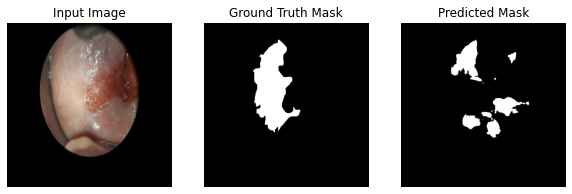

1/1 [==============================] - 0s 18ms/step


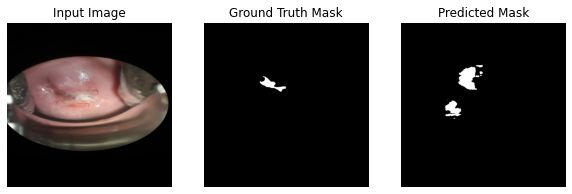

1/1 [==============================] - 0s 18ms/step


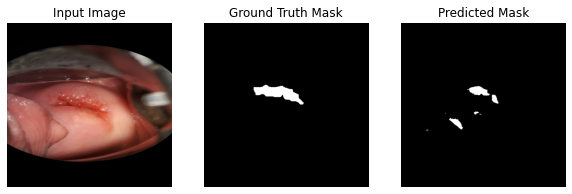

1/1 [==============================] - 0s 23ms/step


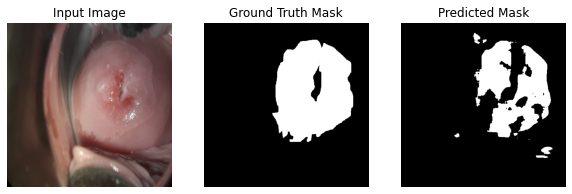

1/1 [==============================] - 0s 18ms/step


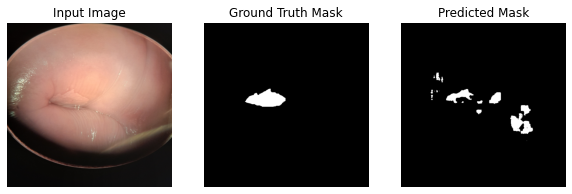

1/1 [==============================] - 0s 19ms/step


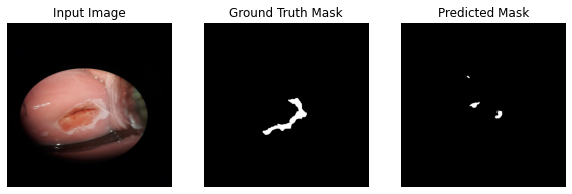

1/1 [==============================] - 0s 18ms/step


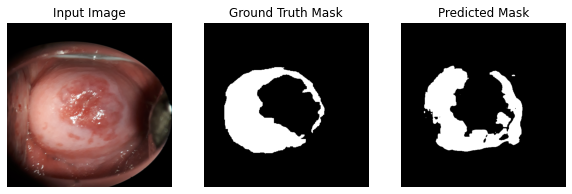

1/1 [==============================] - 0s 20ms/step


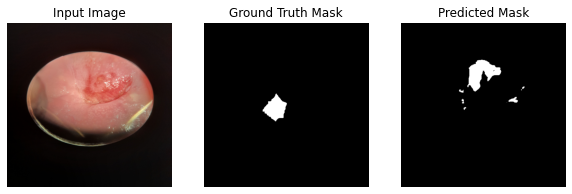

1/1 [==============================] - 0s 18ms/step


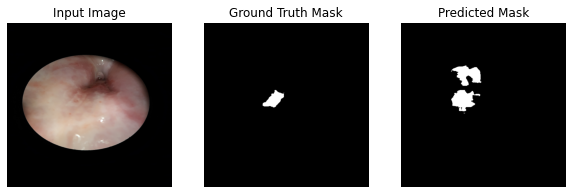

1/1 [==============================] - 0s 27ms/step


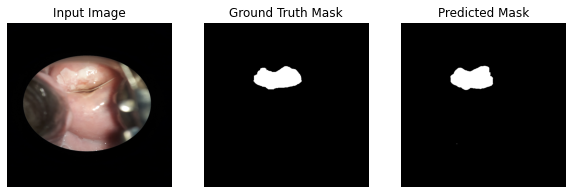

1/1 [==============================] - 0s 24ms/step


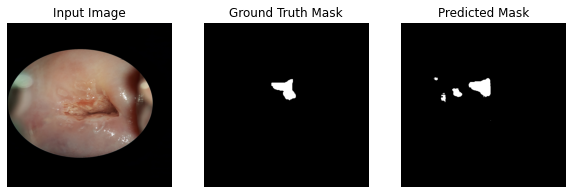

1/1 [==============================] - 0s 18ms/step


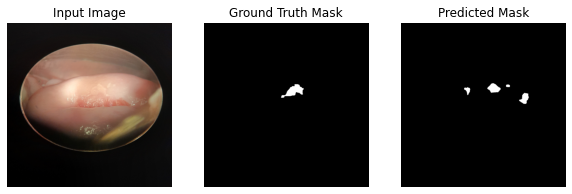

1/1 [==============================] - 0s 18ms/step


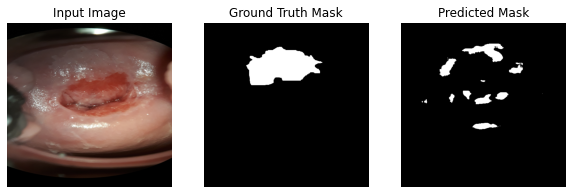

1/1 [==============================] - 0s 18ms/step


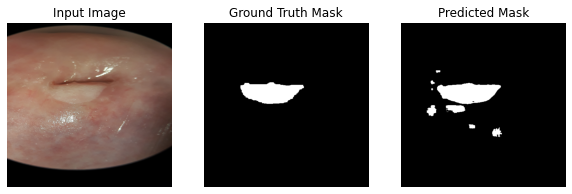

1/1 [==============================] - 0s 18ms/step


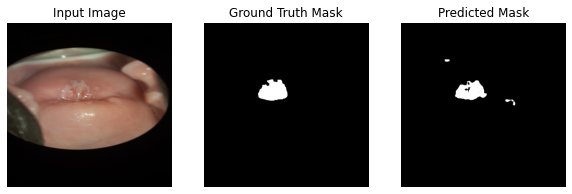

In [ ]:

import random
count = 0
# ind = random.randint(0,32)
for img1, msk in test_dataset:
    img = img1
    for i in range(img.shape[0]):
        count = count + 1
        plt.figure(figsize=(10, 10))
        title = ['Input Image', 'Ground Truth Mask', 'Predicted Mask']
        # title = ['Input Image', 'Ground Truth', 'Prediction']

        plt.axis('off')
        plt.subplot(1, 3, 1)
        plt.title(title[0])
        img = img1
        plt.imshow(img[i])

        im = img[i].numpy()
        im_2 = np.copy(im)
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title(title[1])
        # contours, hierarchy = cv2.findContours(msk[i,:,:,0].numpy().astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        # cv2.drawContours(im, contours, -1, (0,0,255), 2)
        plt.imshow(msk[i,:,:,0], cmap='gray')
        # plt.imshow(im, cmap='gray')


        pred = model.predict(tf.expand_dims(img[i], axis=0))
        # pred =
        # contours1, hierarchy = cv2.findContours((pred[0]>0.95).astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        # cv2.drawContours(im_2, contours1, -1, (255,0,0), 2)
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.imshow(pred[0,:,:,0]>0.95, cmap='gray')
        # plt.imshow(im_2, cmap='gray')
        plt.title(title[2])

        plt.axis('off')
        plt.savefig(fname = '/content/Cervical-cancer/predictions/image_{}.png'.format(count),dpi=300, bbox_inches='tight')
        plt.show()
    # if count ==40:
    #   break
    # break

In [ ]:
!zip -r -q 'predictions.zip' 'predictions'

files.download('/content/Cervical-cancer/predictions.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred[0].shape

(512, 512, 1)

In [ ]:
img[i].shape

TensorShape([512, 512, 3])

In [ ]:
img[i].numpy().shape

(512, 512, 3)

In [ ]:
msk.shape

TensorShape([13, 512, 512, 1])